In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt



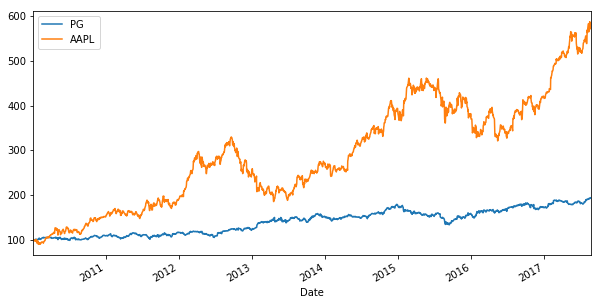

In [4]:
assets = ["PG", "AAPL"]
pfolio_data = pd.DataFrame()

for a in assets:
    pfolio_data[a] = wb.DataReader(a, data_source = "yahoo", start = "2010-1-1")["Adj Close"]

(pfolio_data / pfolio_data.iloc[0] * 100).plot(figsize=(10, 5))

In [5]:
log_returns = np.log(pfolio_data / pfolio_data.shift(1))
log_returns.mean() * 250

PG      0.085637
AAPL    0.228897
dtype: float64

In [6]:
log_returns.cov() * 250

,PG,AAPL
PG,0.019465,0.009867
AAPL,0.009867,0.065147


In [7]:
log_returns.corr()

,PG,AAPL
PG,1.000000,0.277081
AAPL,0.277081,1.000000


In [10]:
weights = np.random.random(2)
weights /= np.sum(weights) 
weights

array([ 0.43614339,  0.56385661])

## Expected annual portfolio return:

In [15]:
np.sum(weights * log_returns.mean()) * 250

0.16641544653268658

## Expected portfolio Variance

In [19]:
np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

0.029267977202316536

## Expected portfolio Volatility

In [17]:
np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights)))

0.17107886252344717

## Portfolio structure simulation 

In [29]:
pfolio_returns = []
pfolio_volatilities = []

for x in range(1000):
    weights = np.random.random(2)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))

pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

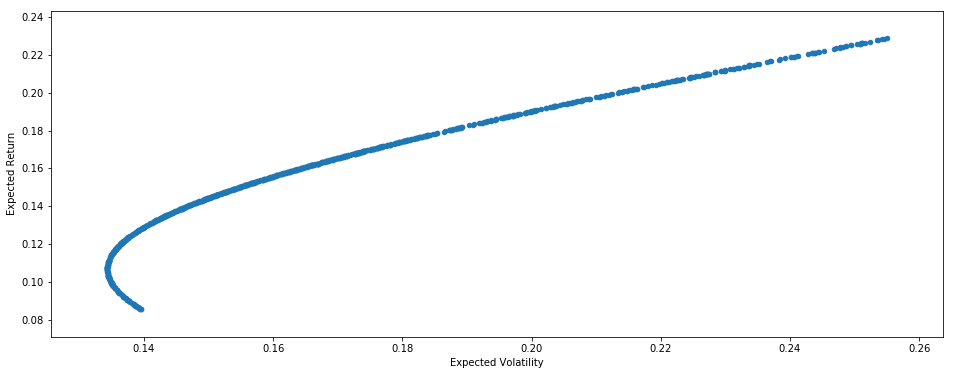

In [32]:
portfolios = pd.DataFrame({"Return":pfolio_returns, "Volatility":pfolio_volatilities})
portfolios.plot(x="Volatility", y="Return", kind="scatter", figsize=(16, 6));
plt.xlabel("Expected Volatility")
plt.ylabel("Expected Return")